In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/HistoricalQuotes.csv')
data.head()

,Date,Close/Last,Volume,Open,High,Low
0,02/28/2020,$273.36,106721200,$257.26,$278.41,$256.37
1,02/27/2020,$273.52,80151380,$281.1,$286,$272.96
2,02/26/2020,$292.65,49678430,$286.53,$297.88,$286.5
3,02/25/2020,$288.08,57668360,$300.95,$302.53,$286.13
4,02/24/2020,$298.18,55548830,$297.26,$304.18,$289.23


In [2]:
from sklearn.preprocessing import MinMaxScaler

data[' Close/Last'] = data[' Close/Last'].replace('[\$,]', '', regex=True).astype(float)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[[' Close/Last']])
scaled_data_df = pd.DataFrame(scaled_data, columns=[' Close/Last'])

In [3]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(scaled_data_df, test_size=0.2, shuffle=False)

print("Training data:")
print(train_data.head())
print("\nTesting data:")
print(test_data.head())

Training data:
   Close/Last
0    0.818943
1    0.819481
2    0.883813
3    0.868444
4    0.902409

Testing data:
      Close/Last
2014    0.152247
2015    0.150638
2016    0.147746
2017    0.146136
2018    0.147006


In [4]:
train_data = train_data.values
test_data = test_data.values

In [5]:
def create_sequences(data, sequence_length=60):
    X, y = [], []
    for i in range(sequence_length, len(data)):
        X.append(data[i-sequence_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

sequence_length = 60
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

print("Training sequences shape:", X_train.shape, y_train.shape)
print("Testing sequences shape:", X_test.shape, y_test.shape)

Training sequences shape: (1954, 60) (1954,)
Testing sequences shape: (444, 60) (444,)


In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

model = Sequential()
model.add(SimpleRNN(units=50, input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0023 - val_loss: 1.4974e-04
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.2074e-04 - val_loss: 4.7557e-05
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.0778e-04 - val_loss: 7.5350e-05
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.0128e-04 - val_loss: 2.8861e-05
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.2159e-04 - val_loss: 5.6589e-05
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.1014e-04 - val_loss: 5.5629e-05
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.0372e-04 - val_loss: 3.2478e-05
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 9.6010e-05 - val_loss: 6.1800e-05
Epoch 9/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.0229e-04 - val_loss: 4.0272e-05
Epoch 10/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 8.6733e-05 - val_loss: 6.3825e-05
Epoch 11/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 1.3997e-04 - 

In [13]:
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


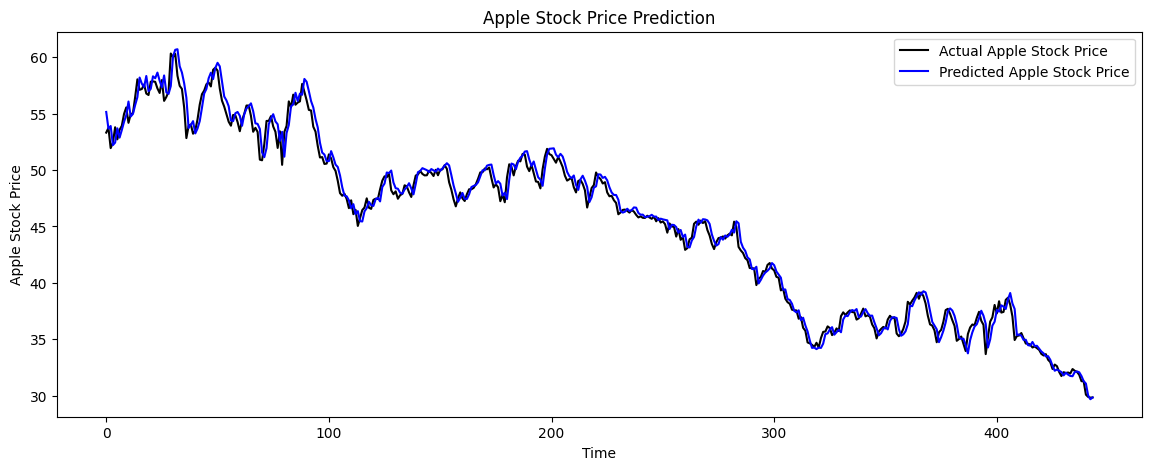

In [14]:
plt.figure(figsize=(14,5))
plt.plot(actual_prices, color='black', label='Actual Apple Stock Price')
plt.plot(predicted_prices, color='blue', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

In [15]:
mae = mean_absolute_error(actual_prices, predicted_prices)
rmse = np.sqrt(mean_squared_error(actual_prices, predicted_prices))

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 0.6442589772061185
Root Mean Squared Error: 0.8603211802567363


The MAE measures the average magnitude of the errors in predictions, without considering their direction, providing an indication of how close predictions are to actual values. In this context, an MAE of 0.644 suggests that, on average, the model's predictions deviate from the true values by about 0.644 units. This value is often straightforward to interpret and gives a sense of the model’s overall accuracy, but it doesn’t weigh larger errors more heavily than smaller ones.

The RMSE of 0.860 further reflects the model's error but emphasizes larger discrepancies due to its squared term. By penalizing larger errors more heavily, RMSE can be particularly informative in scenarios where large deviations are more critical or costly. In comparison with the MAE, a slightly higher RMSE suggests that some predictions are further off, impacting the overall model performance more significantly than the MAE might indicate alone. When RMSE is notably higher than MAE, it often points to the presence of outliers or instances where the model struggles more significantly to make accurate predictions.